In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Read csv file
df = pd.read_csv('adult.data.csv')

In [9]:
#Dataframe
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [11]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

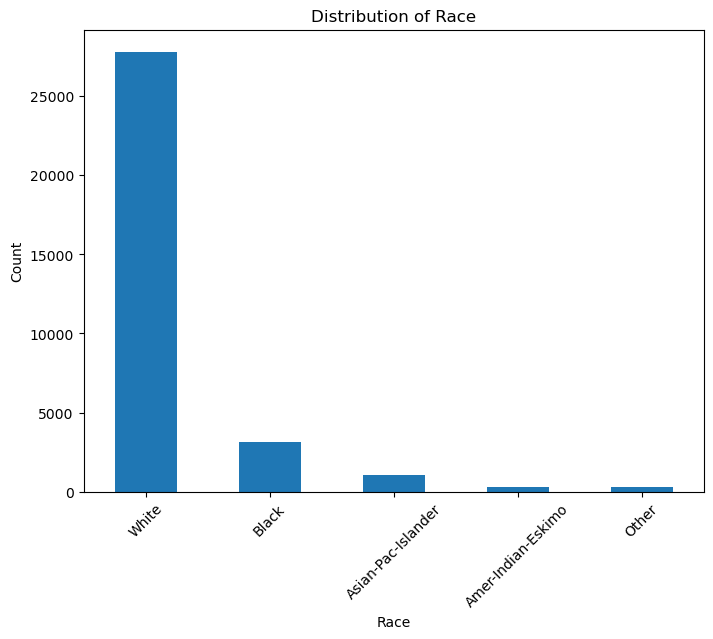

In [12]:
# Race Distribution
plt.figure(figsize=(8, 6))
race_count.plot(kind='bar')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [13]:
df['native-country'] = df['native-country'].replace('?', 'Unknown')

In [14]:
country_count = df['native-country'].value_counts()
country_count

United-States                 29170
Mexico                          643
Unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

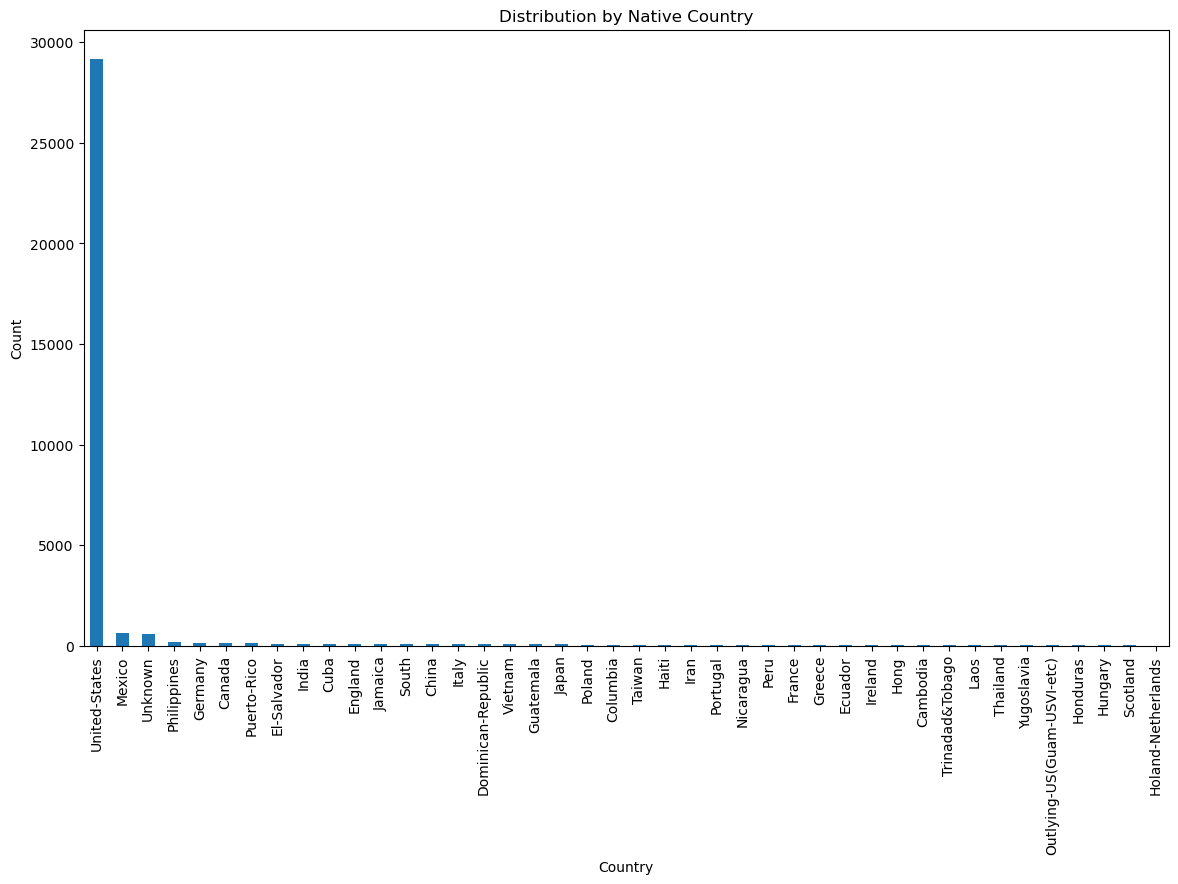

In [15]:
# Distribution by Native Country
plt.figure(figsize=(14, 8))
country_count.plot(kind='bar')
plt.title('Distribution by Native Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

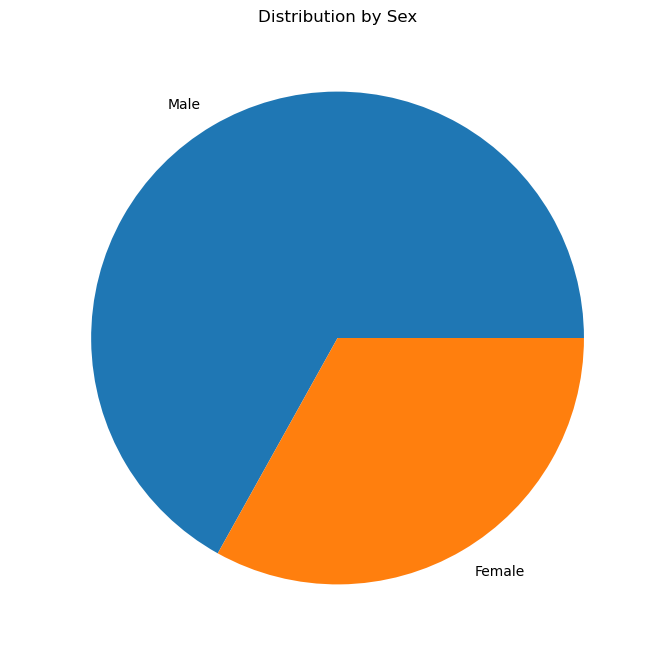

In [16]:
# Distribution by Sex
sex_count = df['sex'].value_counts()
plt.figure(figsize=(14, 8))
sex_count.plot(kind='pie')
plt.title('Distribution by Sex')
plt.ylabel(' ')
plt.show()

In [17]:
# What is the average age of men?
average_age_men = round(df.loc[df['sex'] == 'Male', 'age'].mean(), 1)
average_age_men

39.4

In [18]:
df['workclass'] = df['workclass'].replace('?', 'Unknown')

In [19]:
workclass_count = df['workclass'].value_counts()
workclass_count

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

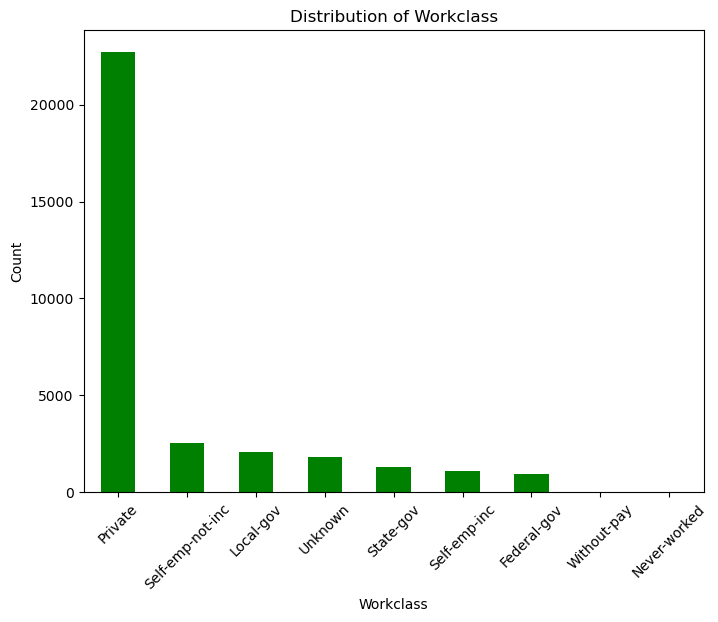

In [20]:
# Workclass Distribution
plt.figure(figsize=(8, 6))
workclass_count.plot(kind='bar', color='green')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
marital_status_count = df['marital-status'].value_counts()
marital_status_count

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

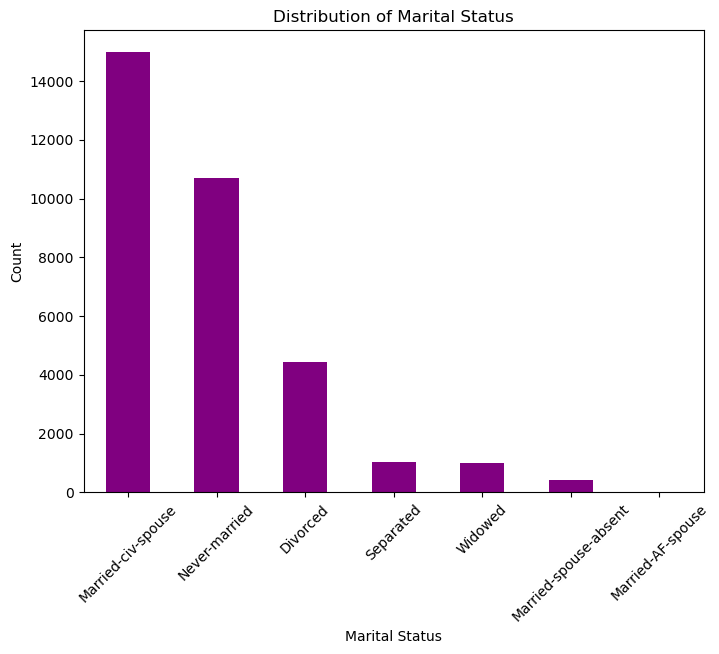

In [22]:
# Marital status Distribution
plt.figure(figsize=(8, 6))
marital_status_count.plot(kind='bar', color='purple')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

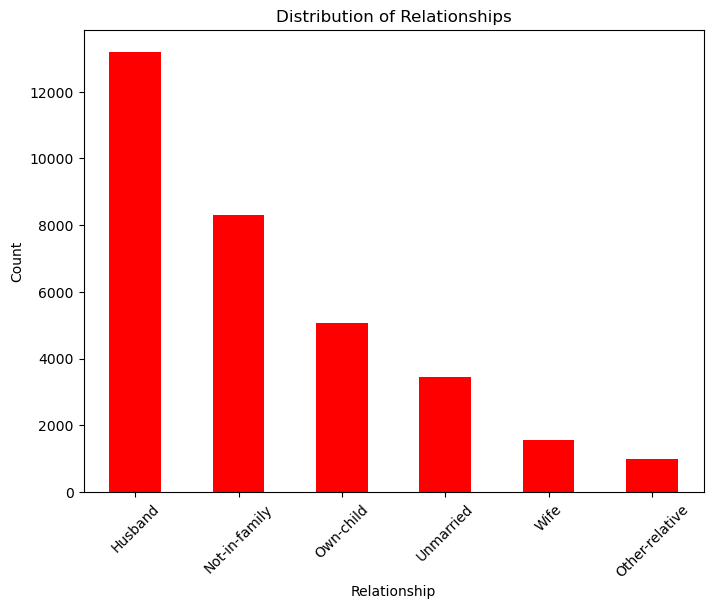

In [23]:
relationship_count = df['relationship'].value_counts()
plt.figure(figsize=(8, 6))
relationship_count.plot(kind='bar', color='red')
plt.title('Distribution of Relationships')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = round(df[df['education'] == 'Bachelors'].shape[0] / df.shape[0] * 100, 1)
percentage_bachelors

16.4

In [25]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# # What percentage of people without advanced education make more than 50K?

# with and without `Bachelors`, `Masters`, or `Doctorate`

higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# percentage with higher education and salary >50K 
higher_education_rich = round(((higher_education)['salary'] == '>50K').mean() * 100, 1)
higher_education_rich


46.5

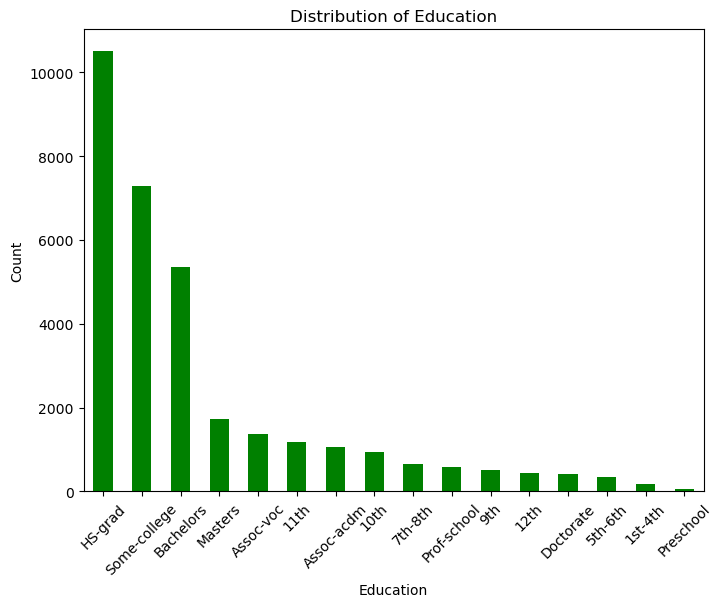

In [26]:
education_count = df['education'].value_counts()
plt.figure(figsize=(8, 6))
education_count.plot(kind='bar', color='green')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
# percentage with lower education and salary >50K 
lower_education_rich = round(((lower_education)['salary'] == '>50K').mean() * 100, 1)
lower_education_rich

17.4

In [28]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours =  df['hours-per-week'].min()
min_work_hours

1

In [29]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
min_work_hours_per_week = df['hours-per-week'] == min_work_hours
salary_more_than_50K = df['salary'] == '>50K'
  
num_min_workers = df[min_work_hours_per_week].shape[0]

rich_percentage = round((df[min_work_hours_per_week & salary_more_than_50K].shape[0] / num_min_workers) * 100, 1)
rich_percentage

10.0

In [30]:
# What country has the highest percentage of people that earn >50K?
highest_earning_country = (df[salary_more_than_50K]['native-country'].value_counts() / df['native-country'].value_counts() * 100).sort_values(ascending=False).index[0]
highest_earning_country

'Iran'

In [31]:
highest_earning_country_percentage = round((df[salary_more_than_50K]['native-country'].value_counts() / df['native-country'].value_counts() * 100).sort_values(ascending=False).iloc[0], 1)
highest_earning_country_percentage

41.9

In [32]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df[(df['native-country'] == 'India') & salary_more_than_50K]['occupation'].value_counts().index[0]
top_IN_occupation

'Prof-specialty'